In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Importing the Voltage measurement**

In [2]:
import numpy as np
import pandas as pd

# Loading the CSV file 
voltage_measurements = '/kaggle/input/voltage-measurements/voltage_measurements.csv'
df = pd.read_csv(voltage_measurements)

print(df)

     Voltage_Measurements
0                5.176405
1                5.040016
2                5.097874
3                5.224089
4                5.186756
..                    ...
995              5.041287
996              4.980160
997              5.009419
998              4.885239
999              4.964189

[1000 rows x 1 columns]


**Draw a histogram to confirm the suspicion that the noise follows a normal distribution**

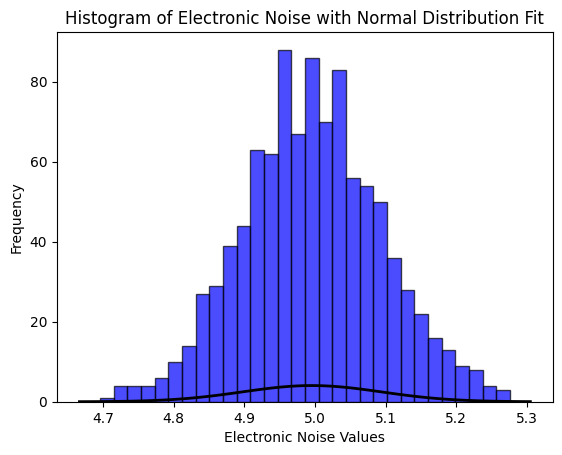

In [9]:
import matplotlib.pyplot as plt
import numpy as np

electronic_noise = df
data = np.array([[electronic_noise]])

# Flatten the 2D array
data_flat = data.flatten()

# Plotting the histogram
plt.hist(data_flat, bins=30, color='blue', edgecolor='black', alpha=0.7)

# Calculating the mean and standard deviation for a normal distribution
mu, sigma = np.mean(data_flat), np.std(data_flat)

# Plotting the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-(x - mu)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)

# Adding a title and labels
plt.title("Histogram of Electronic Noise with Normal Distribution Fit")
plt.xlabel("Electronic Noise Values")
plt.ylabel("Frequency")

# Showing the plot
plt.show()



**Use MLE to estimate the mean and standard deviation of this noise**

In [10]:
# MLE estimate for the mean
mean_estimate = np.mean(data_flat)

# MLE estimate for the standard deviation
std_dev_estimate = np.std(data_flat)

print("MLE Estimate for Mean:", mean_estimate)
print("MLE Estimate for Standard Deviation:", std_dev_estimate)


MLE Estimate for Mean: 4.995474329250981
MLE Estimate for Standard Deviation: 0.09870331586690258
